<a href="https://colab.research.google.com/github/O-Kpy/Kaggle/blob/main/Dacon_%EC%8B%AC%EB%A6%AC_%EC%84%B1%ED%96%A5_%EC%98%88%EC%B8%A1_AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

# **변수 설명**


---

# float변수(연속형)

* Q_A / Q_E (a~t) 비식별화를 위해 일부 질문은 Secret 처리
 >Qa : Secret

 >Qb : The biggest difference between most criminals and other people is that the criminals are stupid enough to get caught.

 >Qc : Anyone who completely trusts anyone else is asking for trouble.

 >Qd : Secret

 >Qe : P.T. Barnum was wrong when he said that there's a sucker born every minute.

 >Qf : There is no excuse for lying to someone else.

 >Qg : Secret

 >Qh : Most people forget more easily the death of their parents than the loss of their property.

 >Qi : Secret

 >Qj : It is safest to assume that all people have a vicious streak and it will come out when they are given a chance.

 >Qk : All in all, it is better to be humble and honest than to be important and dishonest.

 >Ql : Secret

 >Qm : It is hard to get ahead without cutting corners here and there.

 >Qn : Secret

 >Qo : The best way to handle people is to tell them what they want to hear.

 >Qp : Secret

 >Qq : Most people are basically good and kind.

 >Qr : One should take action only when sure it is morally right.

 >Qs : It is wise to flatter important people.

 >Qt : Secret


# 카테고리형 변수(명목형)
* 1=Disagree, 2=Slightly disagree, 3=Neutral, 4=Slightly agree, 5=Agree.



* Q_E(a~t) : 질문을 답할 때까지의 시간


* age_group : 연령


* education : 교육 수준
 >1=Less than high school, 2=High school, 3=University degree, 4=Graduate degree, 0=무응답


* engnat : 모국어가 영어
 >1=Yes, 2=No, 0=무응답


>familysize : 형제자매 수


* gender : 성별
 >Male, Female


* hand : 필기하는 손
 >1=Right, 2=Left, 3=Both, 0=무응답


* married : 혼인 상태
 >1=Never married, 2=Currently married, 3=Previously married, 0=Other


* race : 인종
 >Asian, Arab, Black, Indigenous Australian, Native American, White, Other


* religion : 종교
 >Agnostic, Atheist, Buddhist, Christian_Catholic, Christian_Mormon, 
Christian_Protestant, Christian_Other, Hindu, Jewish, Muslim, Sikh, Other


* tp__(01~07) : items were rated "I see myself as:" _____ such that

 >tp01 : Extraverted, enthusiastic.
 
 >tp02 : Critical, quarrelsome.

 >tp03 : Dependable, self-disciplined.

 >tp04 : Anxious, easily upset.

 >tp05 : Open to new experiences, complex.

 >tp06 : Reserved, quiet.

 >tp07 : Sympathetic, warm.

 >tp08 : Disorganized, careless.

 >tp09 : Calm, emotionally stable.

 >tp10 : Conventional, uncreative.



# 순서형 변수



* urban : 유년기의 거주 구역
 >1=Rural (country side), 2=Suburban, 3=Urban (town, city), 0=무응답




* wr_(01~13) : 실존하는 해당 단어의 정의을 앎
 >1=Yes, 0=No

* wf_(01~03) : 허구인 단어의 정의를 앎
 >1=Yes, 0=No


* voted (타겟): 지난 해 국가 선거 투표 여부
 >1=Yes, 2=No


In [16]:
train = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/연습/심리 성향 예측 AI 경진대회_train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/연습/심리 성향 예측 AI 경진대회_test_x.csv')
print(train.shape, test.shape)

(45532, 78) (11383, 77)


In [17]:
data = pd.concat([train, test]).reset_index(drop=True)
data

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,QtE,age_group,education,engnat,familysize,gender,hand,married,race,religion,tp01,tp02,tp03,tp04,tp05,tp06,tp07,tp08,tp09,tp10,urban,voted,wf_01,wf_02,wf_03,wr_01,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,1115,30s,2,1,4,Female,1,3,White,Other,2,2,2,1,2,1,7,4,4,3,1,2.0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,1346,20s,4,2,3,Female,1,1,Asian,Hindu,1,1,0,0,1,2,3,4,0,4,3,2.0,0,0,0,0,1,0,1,1,0,1,1,0,1,0,1,1
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,1409,30s,3,1,3,Male,1,2,White,Other,2,3,1,5,3,4,2,6,1,3,2,1.0,0,0,1,1,1,0,1,1,0,1,1,1,1,0,1,1
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,1312,20s,4,2,0,Female,1,1,Asian,Hindu,2,4,1,1,1,3,1,3,1,3,3,1.0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,1889,20s,3,1,2,Male,1,2,White,Agnostic,1,1,1,6,0,2,0,6,2,6,1,1.0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56910,11378,5.0,427,5.0,1066,5.0,588,1.0,560,2.0,1110,2.0,438,4.0,378,1.0,1616,3.0,1448,4.0,1886,4.0,852,5.0,872,2.0,526,3.0,381,4.0,818,2.0,736,4.0,828,2.0,1053,2.0,537,4.0,595,20s,3,2,3,Female,1,1,Other,Christian_Catholic,1,0,0,3,0,4,1,0,4,5,0,NaN,0,0,0,1,1,0,1,1,0,1,1,0,1,0,1,1
56911,11379,1.0,314,5.0,554,5.0,230,1.0,956,2.0,1173,1.0,414,1.0,637,1.0,1650,1.0,799,5.0,1220,1.0,548,5.0,630,5.0,366,1.0,287,4.0,543,5.0,505,3.0,554,1.0,600,5.0,307,4.0,722,10s,2,2,1,Female,1,1,Asian,Agnostic,2,0,2,0,0,6,0,0,6,4,2,NaN,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
56912,11380,1.0,627,2.0,799,1.0,739,2.0,1123,1.0,829,2.0,370,2.0,430,4.0,1630,4.0,863,2.0,1452,4.0,712,4.0,1373,2.0,580,2.0,537,2.0,653,2.0,623,2.0,648,2.0,713,4.0,347,2.0,1171,30s,4,1,4,Male,1,2,White,Atheist,4,2,1,6,1,2,1,6,0,5,1,NaN,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1
56913,11381,2.0,539,1.0,2090,2.0,4642,1.0,673,2.0,1185,1.0,525,4.0,1463,1.0,1483,1.0,1113,2.0,883,3.0,2172,5.0,683,1.0,2615,1.0,872,3.0,8006,1.0,878,4.0,515,2.0,4406,4.0,471,2.0,1870,40s,2,1,3,Female,1,2,White,Atheist,4,6,1,6,0,2,1,6,1,5,2,NaN,0,0,0,1,1,0,1,0,0,1,1,0,1,1,1,0


In [76]:
def missing_data(df):
  total = df.isnull().sum()
  percent = round(df.isnull().sum()/len(df)*100, 2)
  table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values('Total', ascending=False)
  table = table[table['Total'] != 0]
  return table

# 데이터 분포확인

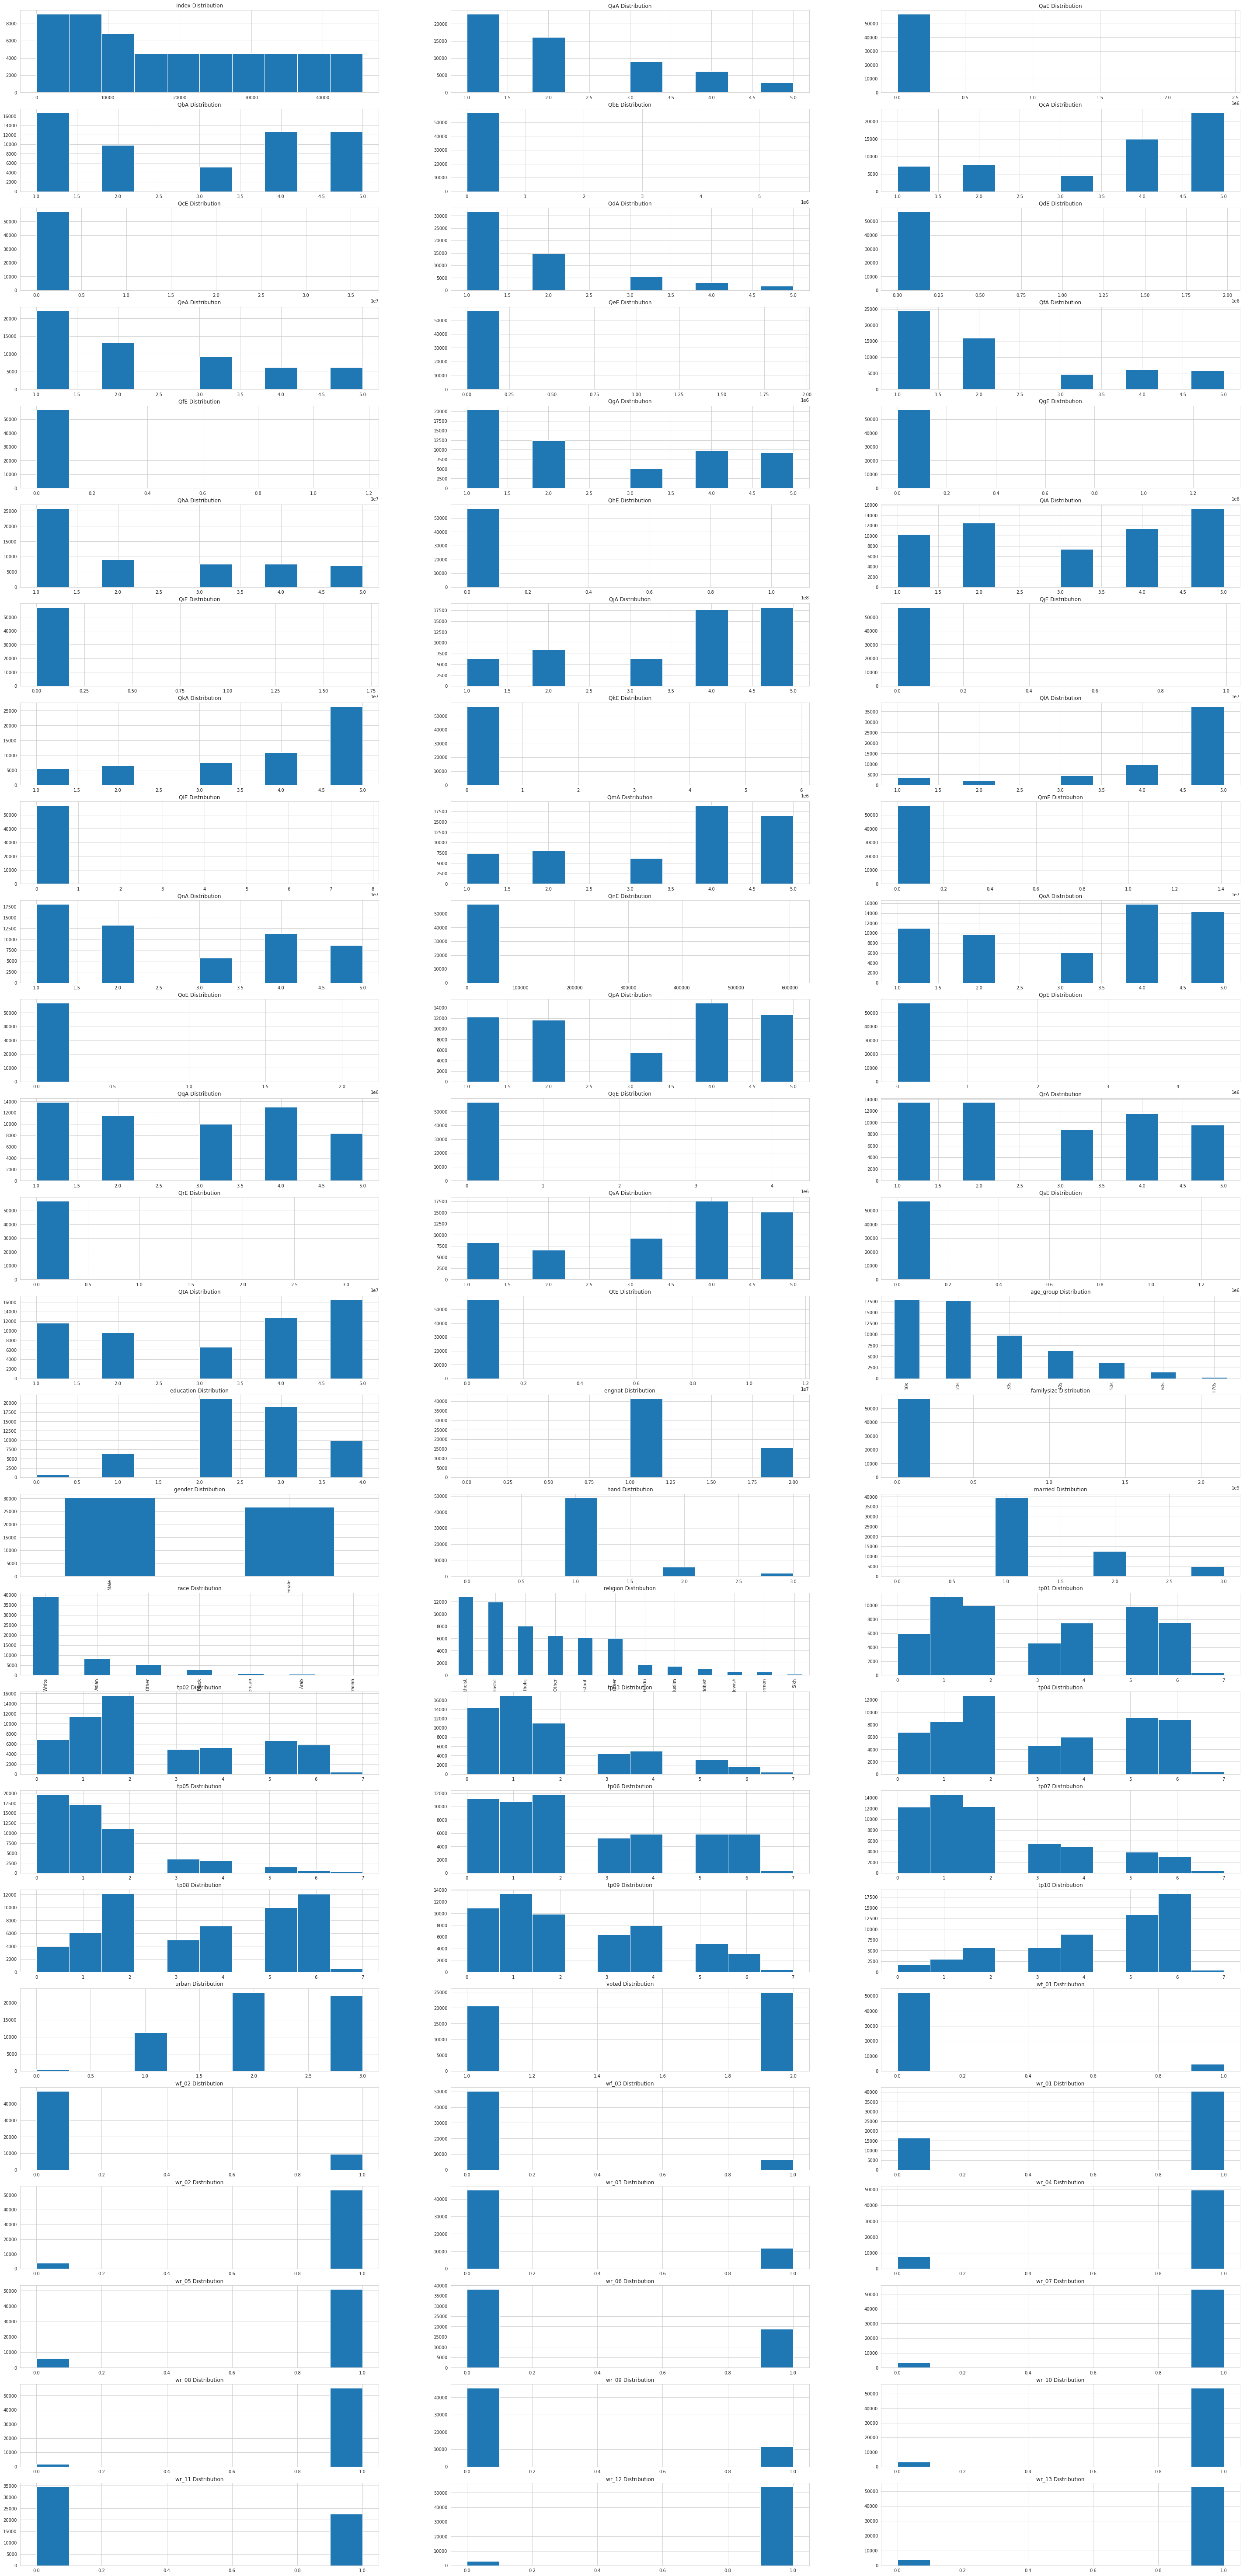

In [57]:
plt.figure(figsize=(50,50))
for j, i in enumerate(data.columns):
  ax = plt.subplot(30,3,j+1)
  if data[i].dtype == 'object':
    data[i].value_counts().plot.bar(ax=ax)
    plt.title(f'{i} Distribution')
    continue
  data[i].hist(ax=ax)
  plt.title(f'{i} Distribution')
plt.subplots_adjust(top=2)

# 데이터 분포 확인

누락값과 에러변수는 안보인다.

---


# 데이터 엔지니어링

1. 명목형 변수 --> 겟더미(원핫코딩) 라벨링
2. Data construction(도메인)
3. aggregation
4. Polynomial(다항식변수 생성 하지만 안해도됨)

In [58]:
for i in data.select_dtypes('object').columns:
  data = pd.get_dummies(data=data, columns=[i])
data.head()

,index,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,QfA,QfE,QgA,QgE,QhA,QhE,QiA,QiE,QjA,QjE,QkA,QkE,QlA,QlE,QmA,QmE,QnA,QnE,QoA,QoE,QpA,QpE,QqA,QqE,QrA,QrE,QsA,QsE,QtA,...,wr_02,wr_03,wr_04,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,age_group_+70s,age_group_10s,age_group_20s,age_group_30s,age_group_40s,age_group_50s,age_group_60s,gender_Female,gender_Male,race_Arab,race_Asian,race_Black,race_Indigenous Australian,race_Native American,race_Other,race_White,religion_Agnostic,religion_Atheist,religion_Buddhist,religion_Christian_Catholic,religion_Christian_Mormon,religion_Christian_Other,religion_Christian_Protestant,religion_Hindu,religion_Jewish,religion_Muslim,religion_Other,religion_Sikh
0,0,3.0,363,4.0,1370,5.0,997,1.0,1024,2.0,1577,5.0,539,2.0,586,4.0,1095,5.0,1142,4.0,1287,4.0,883,4.0,851,2.0,851,5.0,816,2.0,579,2.0,924,2.0,366,2.0,876,2.0,633,1.0,...,1,0,0,1,0,1,1,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1,5.0,647,5.0,1313,3.0,3387,5.0,2969,1.0,4320,3.0,2190,1.0,826,1.0,4082,5.0,1867,3.0,1264,5.0,2943,4.0,3927,1.0,4329,5.0,1828,1.0,1214,5.0,2414,5.0,1356,1.0,3039,4.0,4304,1.0,...,1,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,4.0,1623,1.0,1480,1.0,1021,4.0,3374,5.0,1333,1.0,531,4.0,1167,1.0,1016,3.0,2653,2.0,1569,5.0,998,5.0,2547,2.0,918,4.0,2153,2.0,1304,1.0,1131,5.0,937,4.0,1327,1.0,1170,1.0,...,1,0,1,1,0,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,3,3.0,504,3.0,2311,4.0,992,3.0,3245,1.0,357,2.0,1519,4.0,159,3.0,2275,5.0,2809,4.0,5614,3.0,3219,4.0,1296,4.0,9046,4.0,1216,4.0,1169,4.0,23868,3.0,581,4.0,8830,4.0,2392,5.0,...,1,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,1.0,927,1.0,707,5.0,556,2.0,1062,1.0,1014,2.0,628,1.0,991,1.0,1259,5.0,1153,5.0,1388,5.0,740,5.0,1181,4.0,547,2.0,575,1.0,754,4.0,1140,5.0,323,5.0,1070,1.0,583,2.0,...,1,0,1,1,1,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [64]:
corr_matrix = data.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [c for c in upper.columns if any(abs(upper[c])>0.90)]
to_drop

['gender_Male']

In [66]:
data = data.drop(columns=to_drop)

In [71]:
data_agg = data.drop(columns=['voted']).groupby('index').agg(['min', 'max', 'std', 'sum', 'count'])

data_agg_col = []
for i in data_agg.columns.levels[0]:
  for j in data_agg.columns.levels[1]:
    data_agg_col.append(f'{i}-{j}')

data_agg.columns = data_agg_col
data_agg

,QaA-min,QaA-max,QaA-std,QaA-sum,QaA-count,QaE-min,QaE-max,QaE-std,QaE-sum,QaE-count,QbA-min,QbA-max,QbA-std,QbA-sum,QbA-count,QbE-min,QbE-max,QbE-std,QbE-sum,QbE-count,QcA-min,QcA-max,QcA-std,QcA-sum,QcA-count,QcE-min,QcE-max,QcE-std,QcE-sum,QcE-count,QdA-min,QdA-max,QdA-std,QdA-sum,QdA-count,QdE-min,QdE-max,QdE-std,QdE-sum,QdE-count,...,religion_Christian_Mormon-min,religion_Christian_Mormon-max,religion_Christian_Mormon-std,religion_Christian_Mormon-sum,religion_Christian_Mormon-count,religion_Christian_Other-min,religion_Christian_Other-max,religion_Christian_Other-std,religion_Christian_Other-sum,religion_Christian_Other-count,religion_Christian_Protestant-min,religion_Christian_Protestant-max,religion_Christian_Protestant-std,religion_Christian_Protestant-sum,religion_Christian_Protestant-count,religion_Hindu-min,religion_Hindu-max,religion_Hindu-std,religion_Hindu-sum,religion_Hindu-count,religion_Jewish-min,religion_Jewish-max,religion_Jewish-std,religion_Jewish-sum,religion_Jewish-count,religion_Muslim-min,religion_Muslim-max,religion_Muslim-std,religion_Muslim-sum,religion_Muslim-count,religion_Other-min,religion_Other-max,religion_Other-std,religion_Other-sum,religion_Other-count,religion_Sikh-min,religion_Sikh-max,religion_Sikh-std,religion_Sikh-sum,religion_Sikh-count
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.0,3.0,0.000000,6.0,2,363,736,263.750829,1099,2,2.0,4.0,1.414214,6.0,2,1370,2941,1110.864753,4311,2,3.0,5.0,1.414214,8.0,2,997,4621,2562.554975,5618,2,1.0,1.0,0.000000,2.0,2,1024,4857,2710.340292,5881,2,...,0,0,0.0,0,2,0,0,0.000000,0,2,0,1,0.707107,1,2,0,0,0.000000,0,2,0,0,0.0,0,2,0,0,0.0,0,2,0,1,0.707107,1,2,0,0,0.0,0,2
1,3.0,5.0,1.414214,8.0,2,514,647,94.045202,1161,2,2.0,5.0,2.121320,7.0,2,1313,1952,451.841233,3265,2,3.0,3.0,0.000000,6.0,2,1552,3387,1297.540943,4939,2,3.0,5.0,1.414214,8.0,2,821,2969,1518.865366,3790,2,...,0,0,0.0,0,2,0,0,0.000000,0,2,0,0,0.000000,0,2,0,1,0.707107,1,2,0,0,0.0,0,2,0,0,0.0,0,2,0,0,0.000000,0,2,0,0,0.0,0,2
2,3.0,4.0,0.707107,7.0,2,500,1623,794.080915,2123,2,1.0,2.0,0.707107,3.0,2,1480,2507,726.198664,3987,2,1.0,4.0,2.121320,5.0,2,480,1021,382.544769,1501,2,2.0,4.0,1.414214,6.0,2,614,3374,1951.614716,3988,2,...,0,0,0.0,0,2,0,1,0.707107,1,2,0,0,0.000000,0,2,0,0,0.000000,0,2,0,0,0.0,0,2,0,0,0.0,0,2,0,1,0.707107,1,2,0,0,0.0,0,2
3,1.0,3.0,1.414214,4.0,2,504,669,116.672619,1173,2,1.0,3.0,1.414214,4.0,2,1050,2311,891.661651,3361,2,4.0,5.0,0.707107,9.0,2,992,1435,313.248304,2427,2,2.0,3.0,0.707107,5.0,2,2252,3245,702.157034,5497,2,...,0,0,0.0,0,2,0,0,0.000000,0,2,0,0,0.000000,0,2,0,1,0.707107,1,2,0,0,0.0,0,2,0,0,0.0,0,2,0,0,0.000000,0,2,0,0,0.0,0,2
4,1.0,2.0,0.707107,3.0,2,499,927,302.641702,1426,2,1.0,1.0,0.000000,2.0,2,707,1243,379.009235,1950,2,5.0,5.0,0.000000,10.0,2,556,845,204.353860,1401,2,2.0,2.0,0.000000,4.0,2,1062,1666,427.092496,2728,2,...,0,0,0.0,0,2,0,0,0.000000,0,2,0,0,0.000000,0,2,0,0,0.000000,0,2,0,0,0.0,0,2,0,0,0.0,0,2,0,0,0.000000,0,2,0,0,0.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45527,2.0,2.0,NaN,2.0,1,1050,1050,NaN,1050,1,5.0,5.0,NaN,5.0,1,619,619,NaN,619,1,4.0,4.0,NaN,4.0,1,328,328,NaN,328,1,1.0,1.0,NaN,1.0,1,285,285,NaN,285,1,...,0,0,NaN,0,1,0,0,NaN,0,1,0,0,NaN,0,1,0,0,NaN,0,1,1,1,NaN,1,1,0,0,NaN,0,1,0,0,NaN,0,1,0,0,NaN,0,1
45528,2.0,2.0,NaN,2.0,1,581,581,NaN,581,1,3.0,3.0,NaN,3.0,1,1353,1353,NaN,1353,1,4.0,4.0,NaN,4.0,1,1164,1164,NaN,1164,1,1.0,1.0,NaN,1.0,1,798,798,NaN,798,1,...,0,0,NaN,0,1,0,0,NaN,0,1,0,0,NaN,0,1,0,0,NaN,0,1,0,0,NaN,0,1,0,0,NaN,0,1,0,0,NaN,0,1,0,0,NaN,0,1
45529,4.0,4.0,NaN,4.0,1,593,593,NaN,593,1,1.0,1.0,NaN,1.0,1,857,857,NaN,857,1,1.0,1.0,NaN,1.0,1,1047,1047,NaN,1047,1,4.0,4.0,NaN,4.0,1,1515,1515,NaN,1515,1

In [73]:
data = data.merge(data_agg, how='left', on='index')

In [77]:
missing_data(data)

,Total,Percent
QtE-std,34149,60.0
race_Native American-std,34149,60.0
race_Asian-std,34149,60.0
QpA-std,34149,60.0
race_Black-std,34149,60.0
...,...,...
QiE-std,34149,60.0
QgA-std,34149,60.0
QsE-std,34149,60.0
engnat-std,34149,60.0


In [105]:
x_train = data[data['voted'].notnull()].drop(columns = ['index', 'voted'])
y_train = data[data['voted'].notnull()]['voted']
x_test = data[data['voted'].isnull()].drop(columns=['index', 'voted'])

train_columns = x_train.columns
print(f'x_train:{x_train.shape}, y_train:{y_train.shape}, x_test:{x_test.shape}')

x_train:(45532, 594), y_train:(45532,), x_test:(11383, 594)


In [106]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('scaler', MinMaxScaler())])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.fit_transform(x_test)

In [107]:
x_train = pd.DataFrame(x_train, columns=train_columns)
x_test = pd.DataFrame(x_test, columns=train_columns)

In [108]:
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgbm

scorer = make_scorer(roc_auc_score, greater_is_better=True, needs_proba=True)

In [125]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
lgb_model = np.zeros(x_test.shape[0])
for i, (train_indices, valid_indices) in enumerate(skf.split(X=x_train, y=y_train)):
  X_train, X_valid = x_train.iloc[train_indices], x_train.iloc[valid_indices]
  Y_train, Y_valid = y_train.iloc[train_indices], y_train.iloc[valid_indices]

  model = lgbm.LGBMClassifier(n_jobs=-1, objective='binary', n_estimators=1000)
  model.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)],
            verbose=200, early_stopping_rounds=100, eval_metric='auc')
  
  lgb_model += model.predict_proba(x_test)[:, 1] / skf.n_splits

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[15]	training's auc: 0.781308	training's binary_logloss: 0.563035	valid_1's auc: 0.759486	valid_1's binary_logloss: 0.57652
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[49]	training's auc: 0.819005	training's binary_logloss: 0.521258	valid_1's auc: 0.765084	valid_1's binary_logloss: 0.558178
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[48]	training's auc: 0.819949	training's binary_logloss: 0.521749	valid_1's auc: 0.768371	valid_1's binary_logloss: 0.556576
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[72]	training's auc: 0.841177	training's binary_logloss: 0.503337	valid_1's auc: 0.769622	valid_1's binary_logloss: 0.555577
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[38]	traini

In [133]:
xgb_model = np.zeros(x_test.shape[0])
for i, (train_indices, valid_indices) in enumerate(skf.split(X=x_train, y=y_train)):
  X_train, X_valid = x_train.iloc[train_indices], x_train.iloc[valid_indices]
  Y_train, Y_valid = y_train.iloc[train_indices], y_train.iloc[valid_indices]

  model = xgb.XGBClassifier(n_jobs=-1, n_estimators=1000)
  model.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)],
            verbose=200, early_stopping_rounds=100, eval_metric='auc')
  
  xgb_model += model.predict_proba(x_test)[:, 1] / skf.n_splits

[0]	validation_0-auc:0.739007	validation_1-auc:0.738253
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
Stopping. Best iteration:
[42]	validation_0-auc:0.768933	validation_1-auc:0.756263

[0]	validation_0-auc:0.740085	validation_1-auc:0.733916
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[200]	validation_0-auc:0.800181	validation_1-auc:0.763591
Stopping. Best iteration:
[124]	validation_0-auc:0.786698	validation_1-auc:0.76495

[0]	validation_0-auc:0.738492	validation_1-auc:0.740451
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[200]	validation_0-auc:0.800162	validation_1-auc:0.764765
[400]	validation_0-auc:0.828031	validation_1-auc:0.764163
Stopping. Best i

In [134]:
test_ids = test['index']
submit=pd.read_csv('/content/drive/MyDrive/dataset/Dacon/연습/심리 성향 예측 AI 경진대회_sample_submission.csv')

In [135]:
submit['voted'] = xgb_model
submit

,index,voted
0,0,0.644398
1,1,0.868334
2,2,0.459491
3,3,0.190980
4,4,0.734506
...,...,...
11378,11378,0.486339
11379,11379,0.831717
11380,11380,0.242360
11381,11381,0.302895


In [136]:
submit = submit.set_index('index')
submit

,voted
index,
0,0.644398
1,0.868334
2,0.459491
3,0.190980
4,0.734506
...,...
11378,0.486339
11379,0.831717
11380,0.242360


In [137]:
submit.to_csv('/content/drive/MyDrive/dataset/Dacon/연습/2021-05-15_submit2.csv')